In [1]:
from sklearn.cluster import KMeans
import matplotlib
import pandas as pd
import codecs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('71groups_1081111.csv',encoding ='big5')

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字體設置-黑體
plt.rcParams['axes.unicode_minus'] = False  # 解决保存圖像是負號'-'顯示為方快的問題
sns.set(font='SimHei')  # 解决Seaborn中文顯示問題
pd.set_option('display.max_rows',300)#設置顯示列數
pd.set_option('display.max_columns',800)

In [4]:
df

,品號,碼重 ( 布重) WEIGHT(g/y),織機 針數 (G),用紗條件_1,丹尼數(D)_1,條數(F)_1,單條支數_1,用紗加工_1,用紗成份_1,用紗1_%,用紗1_織造張力/紗線張力,用紗1_織造張力/送紗量,用紗條件_2,單條支數_2,用紗加工_2,用紗成份_2,用紗2_%,用紗2_織造張力/紗線張力,用紗2_織造張力/送紗量,彈性紗丹尼數(D),Lycra規格,OP%,OP紗_織造張力/紗線張力,OP紗_織造張力/送紗量,OP紗織造延伸率/牽伸比,F_彈性回復率3th cycle(%),W_彈性回復率3th cycle(%),F_載荷在預設點 5th cycle(拉伸10%) [gf],W_載荷在預設點 5th cycle(拉伸10%) [gf],F_載荷在預設點 5th cycle(拉伸20%) [gf],W_載荷在預設點 5th cycle(拉伸20%) [gf],F_載荷在預設點 5th cycle(拉伸30%) [gf],W_載荷在預設點 5th cycle(拉伸30%) [gf],F_載荷在預設點 5th cycle(拉伸40%) [gf],W_載荷在預設點 5th cycle(拉伸40%) [gf]
0,32176,70.0,60.0,10D/12F,10.0,12.0,0.83,BR,NF,0.74,2.0,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Xtra Fine LYCRA,0.26,1.00,667.0,0.37,89.139273,89.512783,50.632143,57.460923,123.567223,134.583397,211.802413,228.423157,319.693177,352.357507
1,32039,405.0,28.0,150D/144F,150.0,144.0,1.04,NaN,TW,0.87,6.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,SPANDEX,0.13,7.00,780.0,0.40,91.858020,87.054613,168.758820,226.812237,378.997520,599.152043,621.482390,1127.351463,908.840160,1856.549060
2,32532,125.0,50.0,20D/34F,20.0,34.0,0.59,FD,NF,0.81,2.0,803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.20,2.00,552.0,0.36,87.644857,90.158940,74.974503,74.782117,183.865320,162.141230,273.814907,233.492027,493.897450,387.755720
3,32533,135.0,54.0,20D/34F,20.0,34.0,0.59,BR,NF,0.69,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.31,NaN,768.0,0.46,89.034493,90.229323,79.425153,82.690697,198.658700,184.152117,279.944127,254.922950,488.945573,421.629687
4,32609,135.0,60.0,20D/34F,20.0,34.0,0.59,BR,NF,0.70,3.0,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.30,3.00,600.0,0.35,84.418473,88.738000,98.754147,97.970960,257.554260,224.126513,366.682400,310.001223,728.984473,587.587207
5,32105,135.0,40.0,30D/34F,30.0,34.0,0.88,BR,NF,0.77,3.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.24,2.00,645.0,0.45,86.194983,88.831750,99.402047,73.835503,259.891247,167.429493,461.937787,279.224397,732.802640,419.050780
6,32172,205.0,60.0,30D/34F,30.0,34.0,0.88,BR,NF,0.83,3.0,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,SPANDEX,0.17,2.00,783.0,0.41,83.917340,89.101100,88.200160,106.979310,215.931250,221.457430,348.716740,344.596130,489.225050,477.764150
7,32181,165.0,50.0,30D/34F,30.0,34.0,0.88,BR,NF,0.82,4.0,827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Xtra Fine LYCRA,0.19,2.00,726.0,0.40,86.030087,88.715583,117.199410,101.504457,282.268083,222.516103,468.733613,362.480383,682.733107,536.269667
8,32423,135.0,44.0,30D/34F,30.0,34.0,0.88,BR,NF,0.76,2.5,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.25,2.00,751.0,0.46,89.449627,89.987000,119.332350,87.893580,315.273147,218.836000,566.020560,379.331390,908.246617,591.737410
9,32627G,235.0,60.0,30D/34F,30.0,34.0,0.88,SD,NW,0.70,3.0,1087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,SPANDEX,0.30,3.50,976.0,0.48,90.049833,90.447807,138.082377,157.240407,318.637890,345.487767,525.527293,565.800570,763.323667,843.894557


In [5]:
name = df['品號']

In [6]:
test_40 = df[['F_載荷在預設點 5th cycle(拉伸40%) [gf]','W_載荷在預設點 5th cycle(拉伸40%) [gf]']]

In [29]:
test_30 = df[['F_載荷在預設點 5th cycle(拉伸30%) [gf]','W_載荷在預設點 5th cycle(拉伸30%) [gf]']]

In [30]:
test_20 = df[['F_載荷在預設點 5th cycle(拉伸20%) [gf]','W_載荷在預設點 5th cycle(拉伸20%) [gf]']]

In [31]:
test_10 = df[['F_載荷在預設點 5th cycle(拉伸10%) [gf]','W_載荷在預設點 5th cycle(拉伸10%) [gf]']]

In [32]:
test_3 = df[['F_彈性回復率3th cycle(%)','W_彈性回復率3th cycle(%)']]

## K-Means

In [7]:
clf = KMeans(n_clusters=5)

## 40%

In [8]:
clf.fit(test_40)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
cate_40 = clf.labels_
cate_40 = pd.DataFrame(cate_40)

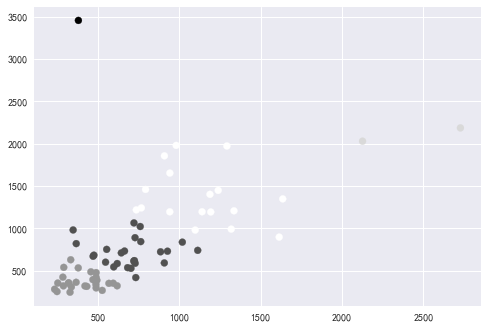

In [10]:
plt.scatter(test_40.iloc[:,0], test_40.iloc[:,1], c=clf.labels_)

In [11]:
test_40 = pd.concat([test_40, cate_40],ignore_index = True,axis=1)

In [13]:
test_40.columns = ['F','W','Category']

In [39]:
for i in range(len(test_40)):
    if test_40.loc[i,'Category']==0:
        test_40.loc[i,'Category']='中彈'
    elif test_40.loc[i,'Category']==3:
        test_40.loc[i,'Category']='中低彈'
    elif test_40.loc[i,'Category']==2:
        test_40.loc[i,'Category']='低彈'
    elif test_40.loc[i,'Category']==4:
        test_40.loc[i,'Category']='高1'
    elif test_40.loc[i,'Category']==1:
        test_40.loc[i,'Category']='高彈'

## 30%

In [33]:
clf.fit(test_30)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
cate_30 = clf.labels_
cate_30 = pd.DataFrame(cate_30)

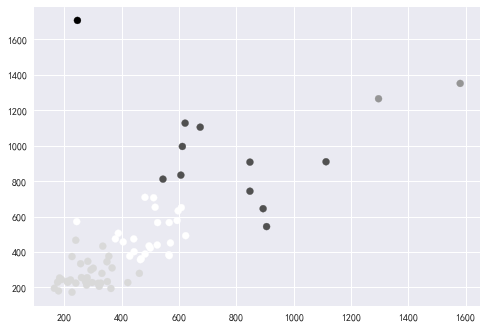

In [35]:
plt.scatter(test_30.iloc[:,0], test_30.iloc[:,1], c=clf.labels_)

In [36]:
test_30 = pd.concat([test_30, cate_30],ignore_index = True,axis=1)

In [37]:
test_30.columns = ['F','W','Category']

In [43]:
for i in range(len(test_30)):
    if test_30.loc[i,'Category']==0:
        test_30.loc[i,'Category']='中低彈'
    elif test_30.loc[i,'Category']==3:
        test_30.loc[i,'Category']='中彈'
    elif test_30.loc[i,'Category']==2:
        test_30.loc[i,'Category']='高彈'
    elif test_30.loc[i,'Category']==4:
        test_30.loc[i,'Category']='高1'
    elif test_30.loc[i,'Category']==1:
        test_30.loc[i,'Category']='低彈'

## 20%

In [45]:
clf.fit(test_20)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
cate_20 = clf.labels_
cate_20 = pd.DataFrame(cate_20)

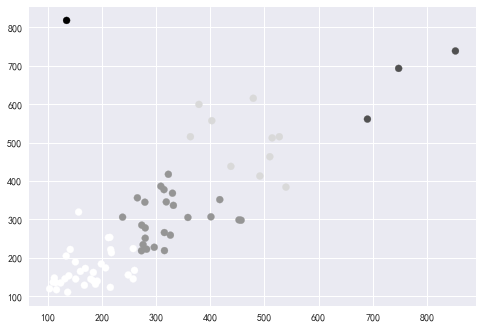

In [47]:
plt.scatter(test_20.iloc[:,0], test_20.iloc[:,1], c=clf.labels_)

In [48]:
test_20 = pd.concat([test_20, cate_20],ignore_index = True,axis=1)

In [49]:
test_20.columns = ['F','W','Category']

In [51]:
for i in range(len(test_20)):
    if test_20.loc[i,'Category']==0:
        test_20.loc[i,'Category']='低彈'
    elif test_20.loc[i,'Category']==3:
        test_20.loc[i,'Category']='高彈'
    elif test_20.loc[i,'Category']==2:
        test_20.loc[i,'Category']='中低彈'
    elif test_20.loc[i,'Category']==4:
        test_20.loc[i,'Category']='高1'
    elif test_20.loc[i,'Category']==1:
        test_20.loc[i,'Category']='中彈'

## 10%

In [52]:
clf.fit(test_10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
cate_10 = clf.labels_
cate_10 = pd.DataFrame(cate_10)

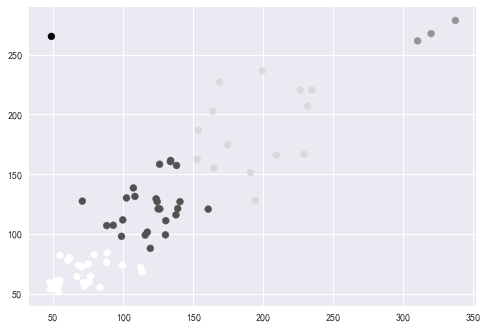

In [54]:
plt.scatter(test_10.iloc[:,0], test_10.iloc[:,1], c=clf.labels_)

In [55]:
test_10 = pd.concat([test_10, cate_10],ignore_index = True,axis=1)

In [56]:
test_10.columns = ['F','W','Category']

In [58]:
for i in range(len(test_10)):
    if test_10.loc[i,'Category']==0:
        test_10.loc[i,'Category']='低彈'
    elif test_10.loc[i,'Category']==3:
        test_10.loc[i,'Category']='中低彈'
    elif test_10.loc[i,'Category']==2:
        test_10.loc[i,'Category']='高彈'
    elif test_10.loc[i,'Category']==4:
        test_10.loc[i,'Category']='高1'
    elif test_10.loc[i,'Category']==1:
        test_10.loc[i,'Category']='中彈'

## 3%

In [61]:
clf.fit(test_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
cate_3 = clf.labels_
cate_3 = pd.DataFrame(cate_3)

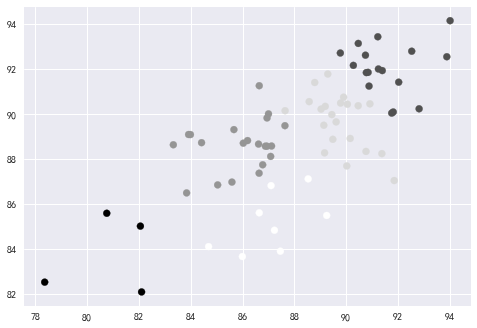

In [63]:
plt.scatter(test_3.iloc[:,0], test_3.iloc[:,1], c=clf.labels_)

In [64]:
test_3 = pd.concat([test_3, cate_3],ignore_index = True,axis=1)

In [65]:
test_3.columns = ['F','W','Category']

In [66]:
test_3

,F,W,Category
0,89.139273,89.512783,1
1,91.858020,87.054613,1
2,87.644857,90.158940,1
3,89.034493,90.229323,1
4,84.418473,88.738000,2
5,86.194983,88.831750,2
6,83.917340,89.101100,2
7,86.030087,88.715583,2
8,89.449627,89.987000,1
9,90.049833,90.447807,1


In [67]:
for i in range(len(test_3)):
    if test_3.loc[i,'Category']==0:
        test_3.loc[i,'Category']='低彈'
    elif test_3.loc[i,'Category']==3:
        test_3.loc[i,'Category']='高1'
    elif test_3.loc[i,'Category']==2:
        test_3.loc[i,'Category']='中彈'
    elif test_3.loc[i,'Category']==4:
        test_3.loc[i,'Category']='低彈'
    elif test_3.loc[i,'Category']==1:
        test_3.loc[i,'Category']='中低彈'

In [68]:
result = pd.concat([name, test_40['Category'],test_30['Category'],test_20['Category'],
                    test_10['Category'],test_3['Category']],ignore_index = True,axis=1)

In [71]:
result.columns = ['name','40%','30%','20%','10%','3th']

In [73]:
result.to_csv('71category_191112.csv',encoding='big5')

In [95]:
df

,品號,碼重 ( 布重) WEIGHT(g/y),織機 針數 (G),用紗條件_1,丹尼數(D)_1,條數(F)_1,單條支數_1,用紗加工_1,用紗成份_1,用紗1_%,用紗1_織造張力/紗線張力,用紗1_織造張力/送紗量,用紗條件_2,單條支數_2,用紗加工_2,用紗成份_2,用紗2_%,用紗2_織造張力/紗線張力,用紗2_織造張力/送紗量,彈性紗丹尼數(D),Lycra規格,OP%,OP紗_織造張力/紗線張力,OP紗_織造張力/送紗量,OP紗織造延伸率/牽伸比,F_彈性回復率3th cycle(%),W_彈性回復率3th cycle(%),F_載荷在預設點 5th cycle(拉伸10%) [gf],W_載荷在預設點 5th cycle(拉伸10%) [gf],F_載荷在預設點 5th cycle(拉伸20%) [gf],W_載荷在預設點 5th cycle(拉伸20%) [gf],F_載荷在預設點 5th cycle(拉伸30%) [gf],W_載荷在預設點 5th cycle(拉伸30%) [gf],F_載荷在預設點 5th cycle(拉伸40%) [gf],W_載荷在預設點 5th cycle(拉伸40%) [gf]
0,32176,70.0,60.0,10D/12F,10.0,12.0,0.83,BR,NF,0.74,2.0,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Xtra Fine LYCRA,0.26,1.00,667.0,0.37,89.139273,89.512783,50.632143,57.460923,123.567223,134.583397,211.802413,228.423157,319.693177,352.357507
1,32039,405.0,28.0,150D/144F,150.0,144.0,1.04,NaN,TW,0.87,6.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,SPANDEX,0.13,7.00,780.0,0.40,91.858020,87.054613,168.758820,226.812237,378.997520,599.152043,621.482390,1127.351463,908.840160,1856.549060
2,32532,125.0,50.0,20D/34F,20.0,34.0,0.59,FD,NF,0.81,2.0,803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.20,2.00,552.0,0.36,87.644857,90.158940,74.974503,74.782117,183.865320,162.141230,273.814907,233.492027,493.897450,387.755720
3,32533,135.0,54.0,20D/34F,20.0,34.0,0.59,BR,NF,0.69,NaN,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.31,NaN,768.0,0.46,89.034493,90.229323,79.425153,82.690697,198.658700,184.152117,279.944127,254.922950,488.945573,421.629687
4,32609,135.0,60.0,20D/34F,20.0,34.0,0.59,BR,NF,0.70,3.0,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.30,3.00,600.0,0.35,84.418473,88.738000,98.754147,97.970960,257.554260,224.126513,366.682400,310.001223,728.984473,587.587207
5,32105,135.0,40.0,30D/34F,30.0,34.0,0.88,BR,NF,0.77,3.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.24,2.00,645.0,0.45,86.194983,88.831750,99.402047,73.835503,259.891247,167.429493,461.937787,279.224397,732.802640,419.050780
6,32172,205.0,60.0,30D/34F,30.0,34.0,0.88,BR,NF,0.83,3.0,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,SPANDEX,0.17,2.00,783.0,0.41,83.917340,89.101100,88.200160,106.979310,215.931250,221.457430,348.716740,344.596130,489.225050,477.764150
7,32181,165.0,50.0,30D/34F,30.0,34.0,0.88,BR,NF,0.82,4.0,827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Xtra Fine LYCRA,0.19,2.00,726.0,0.40,86.030087,88.715583,117.199410,101.504457,282.268083,222.516103,468.733613,362.480383,682.733107,536.269667
8,32423,135.0,44.0,30D/34F,30.0,34.0,0.88,BR,NF,0.76,2.5,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,LYCRA,0.25,2.00,751.0,0.46,89.449627,89.987000,119.332350,87.893580,315.273147,218.836000,566.020560,379.331390,908.246617,591.737410
9,32627G,235.0,60.0,30D/34F,30.0,34.0,0.88,SD,NW,0.70,3.0,1087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,SPANDEX,0.30,3.50,976.0,0.48,90.049833,90.447807,138.082377,157.240407,318.637890,345.487767,525.527293,565.800570,763.323667,843.894557


## Analyze

In [24]:
aa = df.iloc[:,0:25]
bb = test_40['Category']
df2 = pd.concat([aa,bb],axis=1)

In [101]:
a = df.iloc[:,1:3]
b = df.iloc[:,4:7]
c = df.iloc[:,9:12]
d = df.iloc[:,19]
e = df.iloc[:,21:27]
feature = pd.concat([a,b,c,d,e,bb],ignore_index = True,axis=1)
feature.columns = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率',
                   'W彈性回復率','Category']
feature = feature.fillna(0)
features = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率']
x = feature.loc[:,features].values
y = feature['Category'].values
feature_name=feature.columns.values

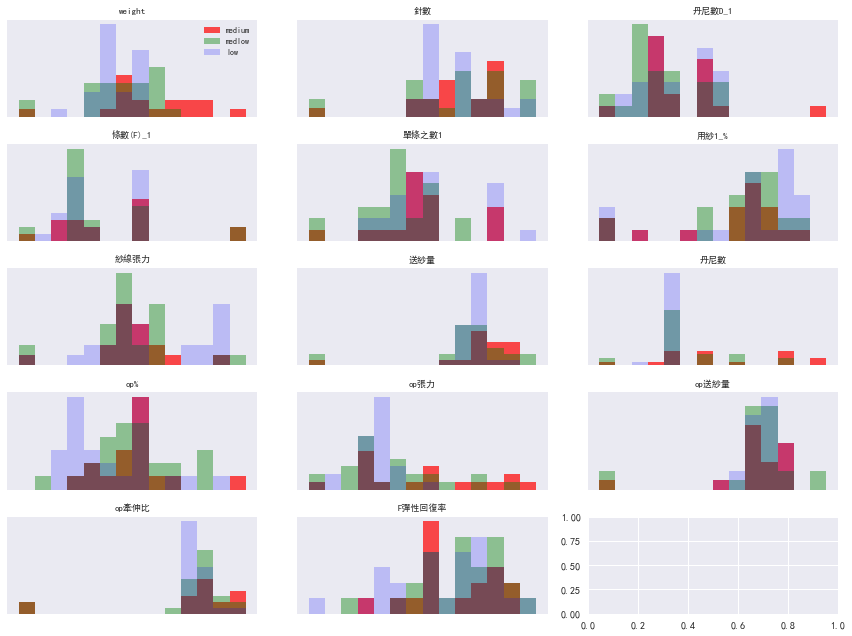

In [106]:
fig,axes =plt.subplots(5,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
med2 = feature.loc[feature['Category']=='中彈']
medlow2 = feature.loc[feature['Category']=='中低彈']
low2 = feature.loc[feature['Category']=='低彈']
ax=axes.ravel()# flat axes with numpy ravel
for i in range(14):
  _,bins=np.histogram(feature.iloc[:,i],bins=14)
  ax[i].hist(med2.iloc[:,i],bins=bins,color='red',alpha=0.7)# red color for malignant class
  ax[i].hist(medlow2.iloc[:,i],bins=bins,color='green',alpha=0.4)# alpha is           for transparency in the overlapped region 
  ax[i].hist(low2.iloc[:,i],bins=bins,color='blue',alpha=0.2)
  ax[i].set_title(feature_name[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['medium','medlow','low'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()
#plt.savefig('pca.png')

/Users/James/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


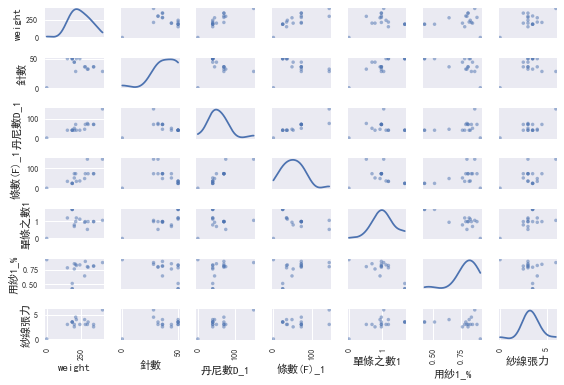

In [111]:
pd.tools.plotting.scatter_matrix(med2.loc[:, "weight":"紗線張力"], diagonal="kde")
plt.tight_layout()
plt.show()

In [25]:
med = df2.loc[df2['Category']=='中彈']
medlow = df2.loc[df2['Category']=='中低彈']
low = df2.loc[df2['Category']=='低彈']

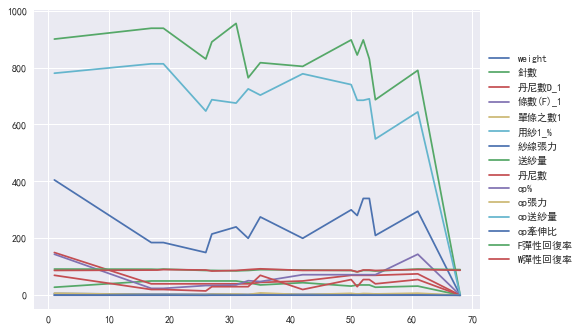

In [112]:
ax = med2[['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率',
                   'W彈性回復率']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [114]:
med2[['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率',
                   'W彈性回復率']].apply(np.mean)

weight     235.588235
針數          38.352941
丹尼數D_1      55.882353
條數(F)_1     58.529412
單條之數1        1.017059
用紗1_%        0.750588
紗線張力         3.264706
送紗量        807.000000
丹尼數         36.176471
op%          0.179412
op張力         4.029412
op送紗量      672.176471
op牽伸比        0.375294
F彈性回復率      88.272385
W彈性回復率      87.981448
dtype: float64

In [115]:
med2[['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率',
                   'W彈性回復率']].apply(np.std)

weight      89.391445
針數          12.522644
丹尼數D_1      29.962491
條數(F)_1     38.024942
單條之數1        0.406170
用紗1_%        0.151870
紗線張力         1.151950
送紗量        213.575720
丹尼數         19.817507
op%          0.060046
op張力         2.239161
op送紗量      181.489664
op牽伸比        0.141051
F彈性回復率       2.706956
W彈性回復率       2.237119
dtype: float64

## PCA

In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = med2.loc[:,features].values
y = med2['Category'].values
x = StandardScaler().fit_transform(x)

In [171]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=15)

In [172]:
principalComponents = pca.fit_transform(x)

In [174]:
pd.DataFrame(pca.components_ ,columns = features,index = ['PC-1','PC-2','PC-3','PC-4','PC-5',
                                                          'PC-6','PC-7','PC-8','PC-9','PC-10','PC-11'
                                                         ,'PC-12','PC-13','PC-14','PC-15'])

,weight,針數,丹尼數D_1,條數(F)_1,單條之數1,用紗1_%,紗線張力,送紗量,丹尼數,op%,op張力,op送紗量,op牽伸比,F彈性回復率,W彈性回復率
PC-1,-0.348174,-0.186330,-0.286462,-0.240572,-0.198931,0.097183,-0.328704,-0.338953,-0.307202,-0.209903,-0.292607,-0.338301,-0.296547,-0.041559,-0.063254
PC-2,-0.206439,0.379005,-0.272929,-0.342459,0.387593,-0.430474,-0.000875,0.197821,-0.270337,0.075699,-0.280576,0.220825,0.133639,0.116031,0.098376
PC-3,-0.062992,-0.187957,-0.142837,-0.021904,-0.160655,-0.208607,-0.126241,-0.185056,0.188887,0.435643,0.165166,-0.122921,0.022351,0.425777,0.608830
PC-4,-0.060019,-0.161751,0.330630,0.227644,0.138911,-0.189589,0.249830,-0.092818,-0.116925,-0.462738,-0.172403,-0.018934,-0.105587,0.643182,-0.010695
PC-5,0.012216,0.166173,0.045796,-0.178044,0.240244,0.053730,0.228896,0.129084,0.138700,-0.051199,0.183748,-0.068688,-0.814323,-0.117550,0.267395
PC-6,0.056492,0.443931,-0.027819,0.406222,-0.310723,0.271408,-0.375185,0.212036,-0.176602,-0.121868,-0.159967,0.275944,-0.147840,0.137050,0.299324
PC-7,0.417330,-0.187223,0.050965,-0.058600,0.252180,-0.342904,-0.690687,0.119859,0.125955,-0.253213,0.148544,-0.027149,-0.080525,-0.017882,-0.050711
PC-8,0.075723,0.244132,-0.350415,-0.140729,-0.099658,0.167361,-0.030726,0.165526,0.081900,0.090072,0.333743,-0.153716,-0.091441,0.546064,-0.519043
PC-9,-0.361167,0.001719,-0.237279,0.586526,-0.047956,-0.481333,0.032957,0.051722,-0.126222,-0.000961,0.359300,-0.069535,-0.127927,-0.208578,-0.147527
PC-10,-0.037849,0.119493,-0.203401,0.072708,0.285847,0.263505,0.058066,0.180457,-0.032103,-0.379671,0.204771,-0.539947,0.377280,-0.047360,0.356811


In [185]:
n_samples = x.shape[0]
# We center the data and compute the sample covariance matrix.
x -= np.mean(x, axis=0)
cov_matrix = np.dot(x.T, x) / n_samples
EIGN = []
for eigenvector in pca.components_:
    A = np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    EIGN.append(A) 
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

6.296880550082314
3.8292615235755534
2.204528901823027
1.159805674060168
0.5170524108328741
0.43974931633598513
0.2568145138816681
0.12921806419459214
0.09048252772284965
0.04971536952478667
0.018828378795002227
0.004694289923165582
0.0012789723307648137
0.001076078226104281
0.0006134286911315567


In [197]:
sum(EIGN[0:4])/sum(EIGN)

0.8993651099694049

In [176]:
pca.explained_variance_

array([6.69043558e+00, 4.06859037e+00, 2.34231196e+00, 1.23229353e+00,
       5.49368187e-01, 4.67233649e-01, 2.72865421e-01, 1.37294193e-01,
       9.61376857e-02, 5.28225801e-02, 2.00051525e-02, 4.98768304e-03,
       1.35890810e-03, 1.14333312e-03, 6.51767984e-04])

In [179]:
AAA = pca.components_ * np.sqrt(pca.explained_variance_)
pd.DataFrame(AAA ,columns = features,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8',
                                              'PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])

,weight,針數,丹尼數D_1,條數(F)_1,單條之數1,用紗1_%,紗線張力,送紗量,丹尼數,op%,op張力,op送紗量,op牽伸比,F彈性回復率,W彈性回復率
PC-1,-0.900583,-0.375841,-0.438418,-0.267056,-0.147446,0.066429,-0.171704,-0.125593,-0.095251,-0.048242,-0.041386,-0.023892,-0.010932,-0.001405,-0.001615
PC-2,-0.533971,0.764482,-0.417708,-0.380159,0.287281,-0.294249,-0.000457,0.073299,-0.083821,0.017398,-0.039685,0.015595,0.004926,0.003923,0.002512
PC-3,-0.162934,-0.379123,-0.218606,-0.024315,-0.119077,-0.142592,-0.065944,-0.068569,0.058566,0.100125,0.023361,-0.008681,0.000824,0.014397,0.015543
PC-4,-0.155245,-0.326265,0.506017,0.252705,0.102960,-0.129592,0.130503,-0.034392,-0.036254,-0.106352,-0.024385,-0.001337,-0.003892,0.021748,-0.000273
PC-5,0.031599,0.335184,0.070089,-0.197645,0.178067,0.036727,0.119567,0.047830,0.043006,-0.011767,0.025989,-0.004851,-0.030019,-0.003975,0.006827
PC-6,0.146123,0.895443,-0.042576,0.450942,-0.230306,0.185520,-0.195983,0.078566,-0.054757,-0.028009,-0.022626,0.019488,-0.005450,0.004634,0.007642
PC-7,1.079461,-0.377643,0.078000,-0.065051,0.186914,-0.234390,-0.360791,0.044412,0.039054,-0.058196,0.021010,-0.001917,-0.002968,-0.000605,-0.001295
PC-8,0.195863,0.492432,-0.536297,-0.156221,-0.073866,0.114399,-0.016050,0.061333,0.025394,0.020701,0.047205,-0.010856,-0.003371,0.018464,-0.013251
PC-9,-0.934189,0.003468,-0.363147,0.651095,-0.035545,-0.329013,0.017215,0.019165,-0.039137,-0.000221,0.050819,-0.004911,-0.004716,-0.007053,-0.003766
PC-10,-0.097900,0.241027,-0.311298,0.080712,0.211868,0.180117,0.030332,0.066865,-0.009954,-0.087260,0.028963,-0.038133,0.013908,-0.001601,0.009109


In [199]:
np.sum(pca.components_[0]**2)

0.9999999999999992

# CORRELATION 40%

In [339]:
TMP = test_40[['F','W']]
df3 = pd.concat([feature,TMP],axis=1)
#df4 = df3.loc[:,features]
features2 = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率','F','W']
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
med3 = df3.loc[df3['Category']=='中彈']

## 中彈

In [306]:
a = []
for i in range(15):
    bb = med3.iloc[:,i]
    cc = bb.corr(med3['F'])
    a.append(cc)

In [307]:
corr_med_F = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [331]:
corr_med_F = corr_med_F.sort_values('F',ascending=False)
corr_med_F.to_csv('med_F.csv',encoding = 'big5')

In [271]:
a = []
for i in range(15):
    bb = med3.iloc[:,i]
    cc = bb.corr(med3['W'])
    a.append(cc)

In [272]:
corr_med_W = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [330]:
corr_med_W = corr_med_W.sort_values('W',ascending=False)
corr_med_W.to_csv('med_W.csv', encoding = 'big5')

## 中低彈

In [293]:
medlow3 = df3.loc[df3['Category']=='中低彈']

In [285]:
a = []
for i in range(15):
    bb = medlow3.iloc[:,i]
    cc = bb.corr(medlow3['F'])
    a.append(cc)

In [286]:
corr_medlow_F = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [329]:
corr_medlow_F = corr_medlow_F.sort_values('F',ascending= False)
corr_medlow_F.to_csv('medlow_F.csv',encoding = 'big5')

In [288]:
a = []
for i in range(15):
    bb = medlow3.iloc[:,i]
    cc = bb.corr(medlow3['W'])
    a.append(cc)

In [289]:
corr_medlow_W = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [328]:
corr_medlow_W = corr_medlow_W.sort_values('W', ascending= False)
corr_medlow_W.to_csv('medlow_W.csv',encoding = 'big5')

## 低彈

In [294]:
low3 = df3.loc[df3['Category']=='低彈']

In [295]:
a = []
for i in range(15):
    bb = low3.iloc[:,i]
    cc = bb.corr(low3['F'])
    a.append(cc)

In [296]:
corr_low_F = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [327]:
corr_low_F = corr_low_F.sort_values('F', ascending= False)
corr_low_F.to_csv('low_F.csv',encoding = 'big5')

In [298]:
a = []
for i in range(15):
    bb = low3.iloc[:,i]
    cc = bb.corr(low3['W'])
    a.append(cc)

In [299]:
corr_low_W = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [326]:
corr_low_W = corr_low_W.sort_values('W', ascending = False)
corr_low_W.to_csv('low_W.csv',encoding='big5')

# Correlation 20%

In [336]:
feature2 = feature.iloc[:,0:15]
df4 = pd.concat([feature2,test_20],axis=1)
#df4 = df3.loc[:,features]
features2 = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率','F','W']
df4 = df4.reset_index()
df4 = df4.drop(columns = 'index')

## 中彈

In [365]:
med4 = df4.loc[df4['Category']=='中彈']

In [366]:
a = []
for i in range(15):
    bb = med4.iloc[:,i]
    cc = bb.corr(med4['F'])
    a.append(cc)

In [367]:
corr_med_F20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [368]:
corr_med_F20 = corr_med_F20.sort_values('F',ascending=False)
corr_med_F20.to_csv('med_F20.csv',encoding = 'big5')

In [369]:
a = []
for i in range(15):
    bb = med4.iloc[:,i]
    cc = bb.corr(med4['W'])
    a.append(cc)

In [370]:
corr_med_W20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [371]:
corr_med_W20 = corr_med_W20.sort_values('W',ascending=False)
corr_med_W20.to_csv('med_W20.csv', encoding = 'big5')

## 中低彈

In [372]:
medlow4 = df4.loc[df4['Category']=='中低彈']

In [373]:
a = []
for i in range(15):
    bb = medlow4.iloc[:,i]
    cc = bb.corr(medlow4['F'])
    a.append(cc)

In [374]:
corr_medlow_F20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [375]:
corr_medlow_F20 = corr_medlow_F20.sort_values('F',ascending=False)
corr_medlow_F20.to_csv('medlow_F20.csv',encoding = 'big5')

In [376]:
a = []
for i in range(15):
    bb = medlow4.iloc[:,i]
    cc = bb.corr(medlow4['W'])
    a.append(cc)

In [377]:
corr_medlow_W20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [378]:
corr_medlow_W20 = corr_medlow_W20.sort_values('W',ascending=False)
corr_medlow_W20.to_csv('medlow_W20.csv', encoding = 'big5')

## 低彈

In [358]:
low4 = df4.loc[df4['Category']=='低彈']

In [359]:
a = []
for i in range(15):
    bb = low4.iloc[:,i]
    cc = bb.corr(low4['F'])
    a.append(cc)

In [360]:
corr_low_F20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [361]:
corr_low_F20 = corr_low_F20.sort_values('F',ascending=False)
corr_low_F20.to_csv('low_F20.csv',encoding = 'big5')

In [362]:
a = []
for i in range(15):
    bb = low4.iloc[:,i]
    cc = bb.corr(low4['W'])
    a.append(cc)

In [363]:
corr_low_W20 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [364]:
corr_low_W20 = corr_low_W20.sort_values('W',ascending=False)
corr_low_W20.to_csv('low_W20.csv', encoding = 'big5')

# Correlation 30%

In [379]:
feature2 = feature.iloc[:,0:15]
df5 = pd.concat([feature2,test_30],axis=1)
#df4 = df3.loc[:,features]
features2 = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率','F','W']
df5 = df5.reset_index()
df5 = df5.drop(columns = 'index')

## 中彈

In [381]:
med5 = df5.loc[df5['Category']=='中彈']

In [382]:
a = []
for i in range(15):
    bb = med5.iloc[:,i]
    cc = bb.corr(med5['F'])
    a.append(cc)

In [383]:
corr_med_F30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [384]:
corr_med_F30 = corr_med_F30.sort_values('F',ascending=False)
corr_med_F30.to_csv('med_F30.csv',encoding = 'big5')

In [385]:
a = []
for i in range(15):
    bb = med5.iloc[:,i]
    cc = bb.corr(med5['W'])
    a.append(cc)

In [386]:
corr_med_W30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [387]:
corr_med_W30 = corr_med_W30.sort_values('W',ascending=False)
corr_med_W30.to_csv('med_W30.csv', encoding = 'big5')

## 中低彈

In [388]:
medlow5 = df5.loc[df5['Category']=='中低彈']

In [389]:
a = []
for i in range(15):
    bb = medlow5.iloc[:,i]
    cc = bb.corr(medlow5['F'])
    a.append(cc)

In [390]:
corr_medlow_F30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [391]:
corr_medlow_F30 = corr_medlow_F30.sort_values('F',ascending=False)
corr_medlow_F30.to_csv('medlow_F30.csv',encoding = 'big5')

In [392]:
a = []
for i in range(15):
    bb = medlow5.iloc[:,i]
    cc = bb.corr(medlow5['W'])
    a.append(cc)

In [393]:
corr_medlow_W30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [394]:
corr_medlow_W30 = corr_medlow_W30.sort_values('W',ascending=False)
corr_medlow_W30.to_csv('medlow_W30.csv', encoding = 'big5')

## 低彈

In [395]:
low5 = df5.loc[df5['Category']=='低彈']

In [396]:
a = []
for i in range(15):
    bb = low5.iloc[:,i]
    cc = bb.corr(low5['F'])
    a.append(cc)

In [397]:
corr_low_F30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [398]:
corr_low_F30 = corr_low_F30.sort_values('F',ascending=False)
corr_low_F30.to_csv('low_F30.csv',encoding = 'big5')

In [399]:
a = []
for i in range(15):
    bb = low5.iloc[:,i]
    cc = bb.corr(low5['W'])
    a.append(cc)

In [400]:
corr_low_W30 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [401]:
corr_low_W30 = corr_low_W30.sort_values('W',ascending=False)
corr_low_W30.to_csv('low_W30.csv', encoding = 'big5')

# Correlation 10%

In [403]:
feature2 = feature.iloc[:,0:15]
df6 = pd.concat([feature2,test_10],axis=1)
#df4 = df3.loc[:,features]
features2 = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率','F','W']
df6 = df6.reset_index()
df6 = df6.drop(columns = 'index')

## 中彈

In [405]:
med6 = df6.loc[df6['Category']=='中彈']

In [406]:
a = []
for i in range(15):
    bb = med6.iloc[:,i]
    cc = bb.corr(med6['F'])
    a.append(cc)

In [407]:
corr_med_F10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [408]:
corr_med_F10 = corr_med_F10.sort_values('F',ascending=False)
corr_med_F10.to_csv('med_F10.csv',encoding = 'big5')

In [409]:
a = []
for i in range(15):
    bb = med6.iloc[:,i]
    cc = bb.corr(med6['W'])
    a.append(cc)

In [410]:
corr_med_W10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [411]:
corr_med_W10 = corr_med_W10.sort_values('W',ascending=False)
corr_med_W10.to_csv('med_W10.csv', encoding = 'big5')

## 中低彈

In [412]:
medlow6= df6.loc[df6['Category']=='中低彈']

In [413]:
a = []
for i in range(15):
    bb = medlow6.iloc[:,i]
    cc = bb.corr(medlow6['F'])
    a.append(cc)

In [414]:
corr_medlow_F10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [415]:
corr_medlow_F10 = corr_medlow_F10.sort_values('F',ascending=False)
corr_medlow_F10.to_csv('medlow_F10.csv',encoding = 'big5')

In [416]:
a = []
for i in range(15):
    bb = medlow6.iloc[:,i]
    cc = bb.corr(medlow6['W'])
    a.append(cc)

In [417]:
corr_medlow_W10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [418]:
corr_medlow_W10 = corr_medlow_W10.sort_values('W',ascending=False)
corr_medlow_W10.to_csv('medlow_W10.csv', encoding = 'big5')

## 低彈

In [419]:
low6= df6.loc[df6['Category']=='低彈']

In [420]:
a = []
for i in range(15):
    bb = low6.iloc[:,i]
    cc = bb.corr(low6['F'])
    a.append(cc)

In [421]:
corr_low_F10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['F'])

In [422]:
corr_low_F10 = corr_low_F10.sort_values('F',ascending=False)
corr_low_F10.to_csv('low_F10.csv',encoding = 'big5')

In [423]:
a = []
for i in range(15):
    bb = low6.iloc[:,i]
    cc = bb.corr(low6['W'])
    a.append(cc)

In [424]:
corr_low_W10 = pd.DataFrame(a, index = ['weight','針數','丹尼數D_1','條數(F)_1','單條之數1','用紗1_%','紗線張力',
                   '送紗量','丹尼數','op%','op張力','op送紗量','op牽伸比','F彈性回復率','W彈性回復率'], columns = ['W'])

In [425]:
corr_low_W10 = corr_low_W10.sort_values('W',ascending=False)
corr_low_W10.to_csv('low_W10.csv', encoding = 'big5')